In [411]:
import gc, argparse, sys, os, errno
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
import h5py
import os
from tqdm import tqdm_notebook as tqdm
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
styles = ["white","dark",'whitegrid',"darkgrid"]
contexts = ['paper','talk','poster','notebook']
sns.set_context(contexts[3])
sns.set_style(styles[2])

Populating the interactive namespace from numpy and matplotlib


RNA types 各画各的, CPM

In [2]:
cd ..

/home/chenxupeng/projects/training


In [3]:
ls data/cpm

cpm.exoRBase.txt
cpm.exoRBase_variance.txt
cpm.piranha_peaks_iterative_43.txt
cpm.piranha_peaks_iterative_43_variance.txt
cpm.scirep_sequential_qc.txt
cpm.scirep_sequential_qc_variance.txt
cpm.transcripts_exrna_43.txt
cpm.transcripts_exrna_43_variance.txt


In [368]:
scirepcpm = pd.read_csv('data/expression_matrix/scirep_sequential_qc.txt',index_col=0,sep='\t')
exorbasecpm = pd.read_csv('data/expression_matrix/exoRBase.txt',sep='\t',index_col=0)
hcccpm = pd.read_csv('data/expression_matrix/transcripts_exrna_43.txt',index_col=0)
hccpeakcpm = pd.read_csv('data/expression_matrix/piranha_peaks_iterative_43.txt',index_col=0)

In [351]:
# 按batch 分组画中位数之类的box

In [352]:
ls data/batch_effect

combat.batch_1.scirep_sequential_qc_variance.txt
combat.batch_2.scirep_sequential_qc_variance.txt
combat.batch_3.scirep_sequential_qc_variance.txt
combat.piranha_peaks_iterative_43_variance.txt
combat.transcripts_exrna_43_variance.txt
hcc_batch_info.txt
logged.combat.batch_1.scirep_sequential_qc_variance.txt
logged.combat.batch_2.scirep_sequential_qc_variance.txt
logged.combat.batch_3.scirep_sequential_qc_variance.txt
logged.combat.piranha_peaks_iterative_43_variance.txt
logged.combat.transcripts_exrna_43_variance.txt
logged.ruvs.exoRBase_variance.txt
logged.ruvs.piranha_peaks_iterative_43_variance.txt
logged.ruvs.scirep_sequential_qc_variance.txt
logged.ruvs.transcripts_exrna_43_variance.txt
reversed.logged.combat.batch_1.scirep_sequential_qc_variance.txt
reversed.logged.combat.batch_2.scirep_sequential_qc_variance.txt
reversed.logged.combat.batch_3.scirep_sequential_qc_variance.txt
reversed.logged.combat.piranha_peaks_iterative_43_variance.txt
reversed.logged.combat.transcripts_exrna

In [353]:
scirepbatch = pd.read_csv('data/batch_effect/scirep_batch_info_renameid.txt',sep=',',index_col=0)
exorabbatch = pd.read_csv('data/labels/sample_classes.exoRBase.txt',index_col=1).iloc[:,1:]
hccbatch = pd.read_csv('data/batch_effect/hcc_batch_info.txt',index_col=0,sep='\t')

In [412]:
batchtable = scirepbatch
#counts = np.log2(scirepcpm+1).sum()
counts = scirepcpm.sum()
sumtable = pd.DataFrame(counts,columns=['total counts'])
sumtable_whole = pd.concat((sumtable,batchtable.loc[sumtable.index]),axis=1)

Text(0.5,1,'Scirep batch effect: RNA Isolation batch')

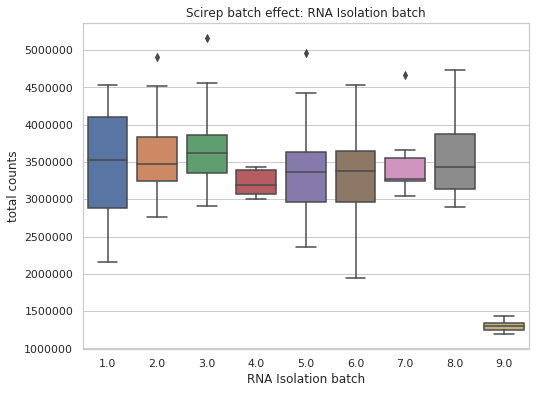

In [413]:
fig,ax=plt.subplots(figsize=(8,6))
sns.boxplot(data=sumtable_whole,x='RNA Isolation batch',y='total counts')
ax.set_title('Scirep batch effect: RNA Isolation batch')

Text(0.5,1,'Scirep batch effect: library prepration day')

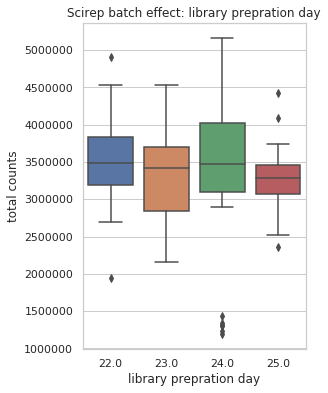

In [414]:
fig,ax=plt.subplots(figsize=(4,6))
sns.boxplot(data=sumtable_whole,x='library prepration day',y='total counts')
ax.set_title('Scirep batch effect: library prepration day')

Text(0.5,1,'Scirep batch effect: gel cut size selection')

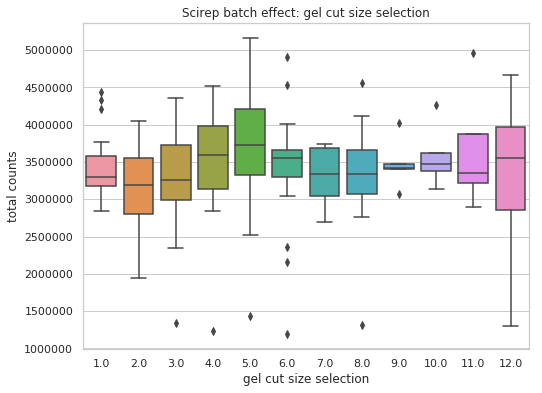

In [415]:
fig,ax=plt.subplots(figsize=(8,6))
sns.boxplot(data=sumtable_whole,x='gel cut size selection',y='total counts')
ax.set_title('Scirep batch effect: gel cut size selection')

In [416]:
batchtable = exorabbatch
counts = exorbasecpm.sum()
sumtable = pd.DataFrame(counts,columns=['total counts'])
sumtable_whole = pd.concat((sumtable,batchtable.loc[sumtable.index]),axis=1)

Text(0.5,1,'exoRBase batch effect: lab')

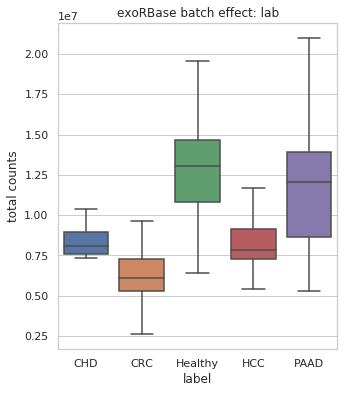

In [417]:
fig,ax=plt.subplots(figsize=(5,6))
sns.boxplot(data=sumtable_whole,x='label',y='total counts')
ax.set_title('exoRBase batch effect: lab')

In [408]:
sns.set_context(contexts[0])
sns.set_style(styles[2])

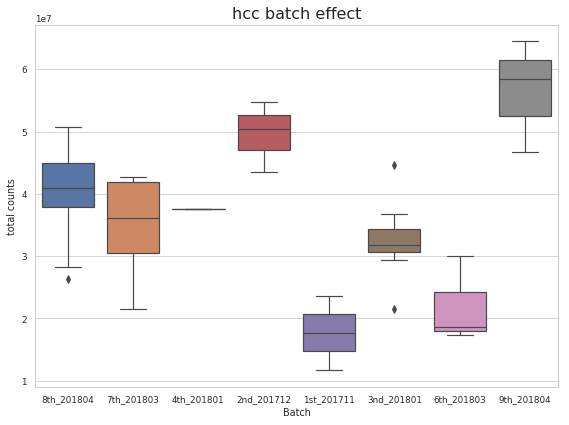

In [409]:
batchtable = hccbatch
counts = hcccpm.sum()
sumtable = pd.DataFrame(counts,columns=['total counts'])
sumtable_whole = pd.concat((sumtable,batchtable.loc[sumtable.index]),axis=1)
fig,ax=plt.subplots(figsize=(8,6))
sns.boxplot(data=sumtable_whole,x='Batch',y='total counts')
ax.set_title('hcc batch effect',size=16)
plt.tight_layout()

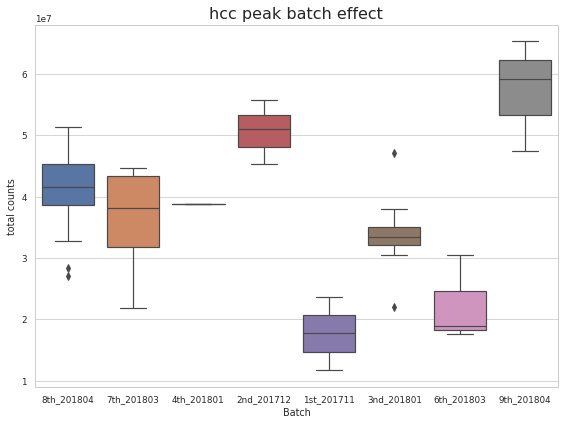

In [410]:
batchtable = hccbatch
counts = hccpeakcpm.sum()
sumtable = pd.DataFrame(counts,columns=['total counts'])
sumtable_whole = pd.concat((sumtable,batchtable.loc[sumtable.index]),axis=1)
fig,ax=plt.subplots(figsize=(8,6))
sns.boxplot(data=sumtable_whole,x='Batch',y='total counts')
ax.set_title('hcc peak batch effect',size=16)
plt.tight_layout()

### RNA types

In [418]:
ls data/rnatypes/

exorbase_rna_stats.csv  hcc_rna_stats.csv  scirep_rna_stats.csv


In [419]:
hcctypes = pd.read_csv('data/rnatypes/hcc_rna_stats.csv',index_col=0)
exorbasetypes = pd.read_csv('data/exosome_exoRBase_stat/whole.csv',sep='\t',index_col=0)
scireptypes = pd.read_csv('data/rnatypes/scirep_rna_stats.csv',index_col=0)

In [428]:
hcctypes_ = hcctypes/hcctypes.loc['cleanN']
exorbasetypes_ = exorbasetypes/exorbasetypes.sum()
scireptypes_ = scireptypes/scireptypes.loc['cleanN']

In [429]:
interestedrna = np.array(['Y_RNA', 'lncRNA', 'mRNA', 'miRNA', 'piRNA', 'snRNA', 'snoRNA',
       'srpRNA', 'tRNA'])

In [441]:
def plot_rna_batch(dataname,rnaname,batchname='Batch'):
    if dataname =='scirep':
        batchtable = scirepbatch
        types = scireptypes_
        fig,ax=plt.subplots(figsize=(6,6))
    if dataname =='exoRBase':
        batchtable = exorabbatch
        types = exorbasetypes_
        batchname =  'label'
        fig,ax=plt.subplots(figsize=(5,6))
    if dataname =='hcc':
        batchtable = hccbatch
        types = hcctypes_
        fig,ax=plt.subplots(figsize=(9,6))
    counts = types.loc[rnaname].T#np.log2(hccpeakcpm+1).sum()
    sumtable = pd.DataFrame(counts)
    sumtable_whole = pd.concat((sumtable.loc[batchtable.index],batchtable),axis=1)
    
    sns.boxplot(data=sumtable_whole,x=batchname,y=rnaname)
    ax.set_title(dataname + ' batch effect',size=16)
    plt.tight_layout()

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=9), HTML(value='')))

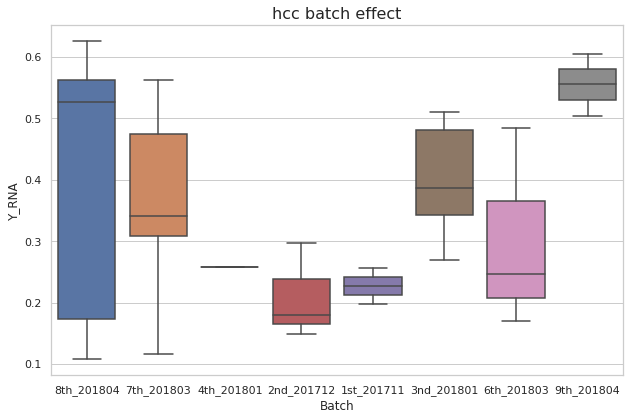

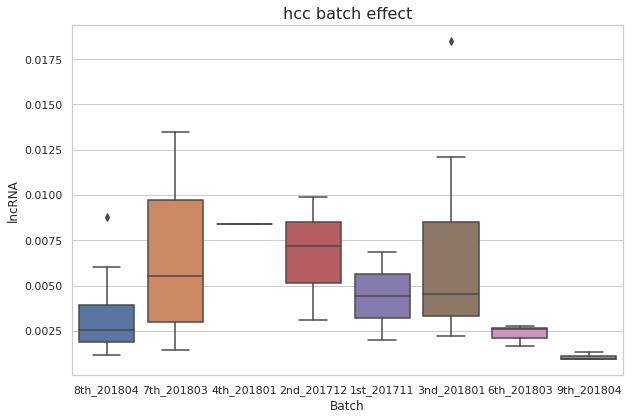

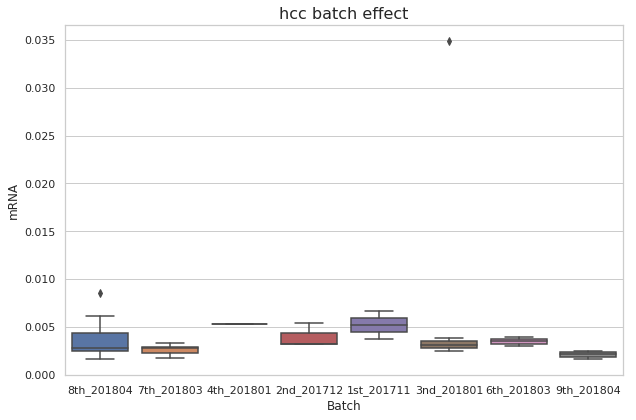

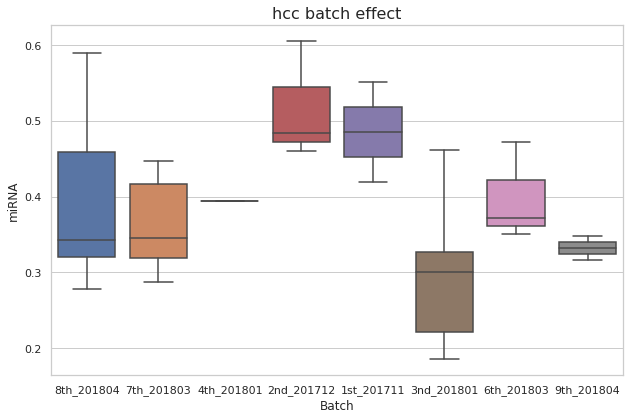

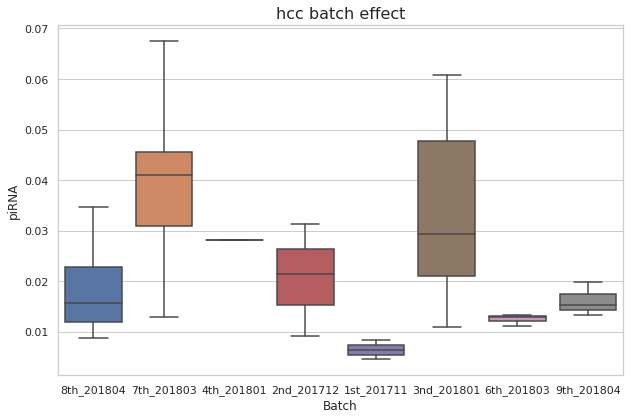

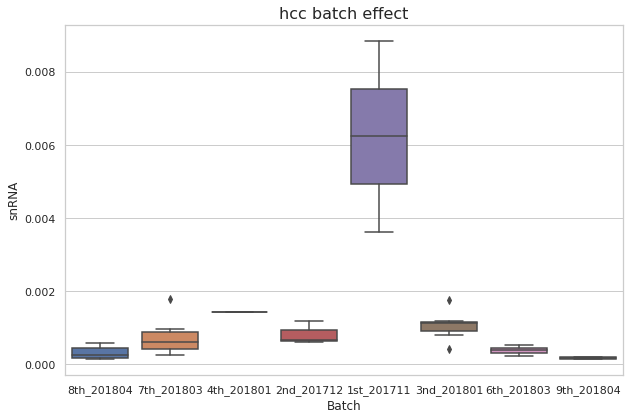

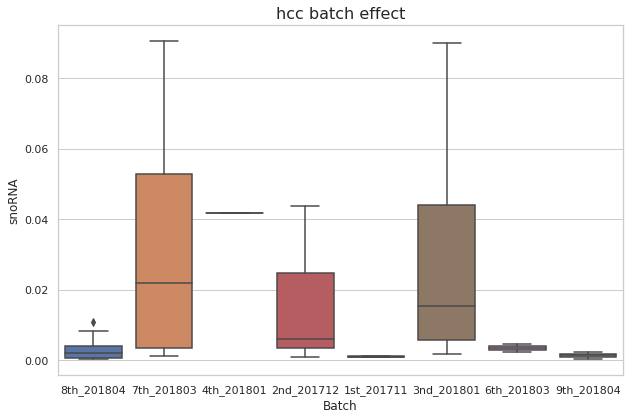

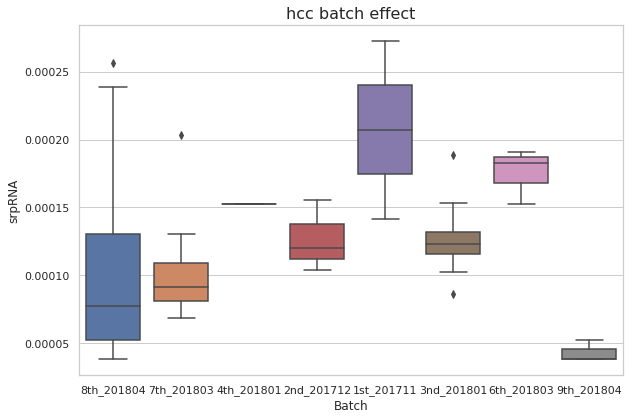

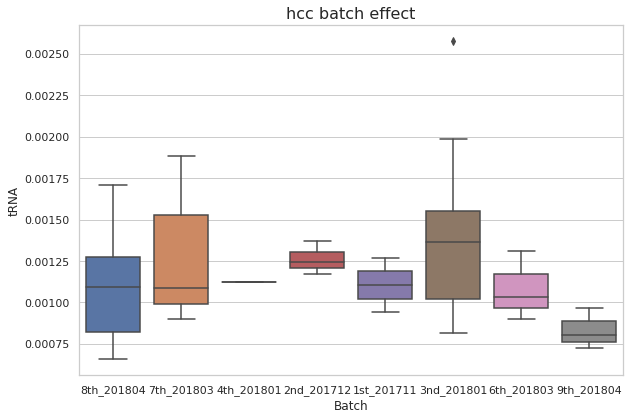

In [437]:
for i in tqdm(['hcc']):
    for j in tqdm(range(interestedrna.shape[0])):
        plot_rna_batch(i,interestedrna[j])

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

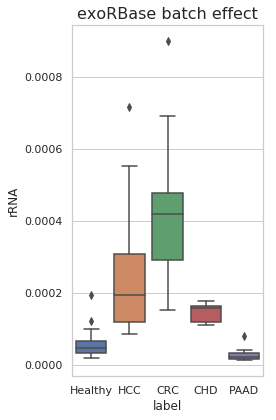

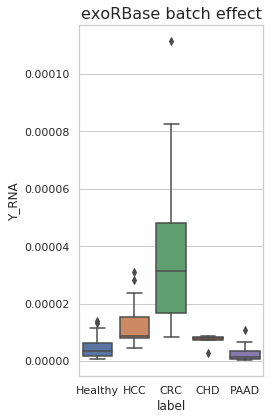

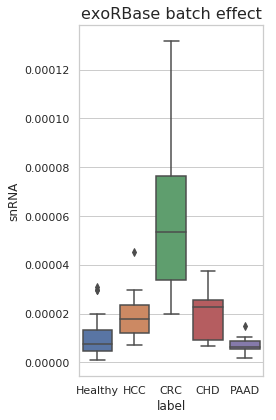

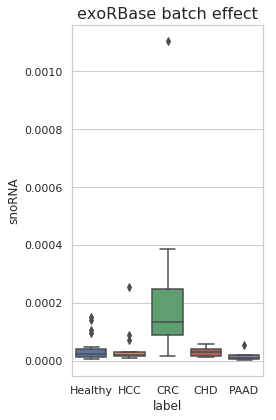

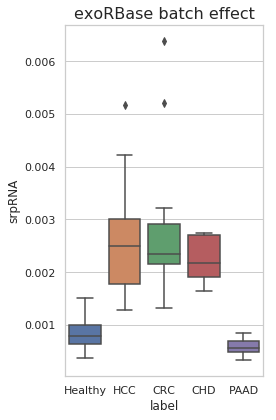

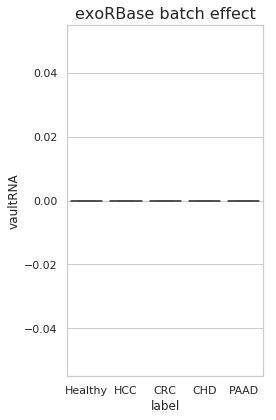

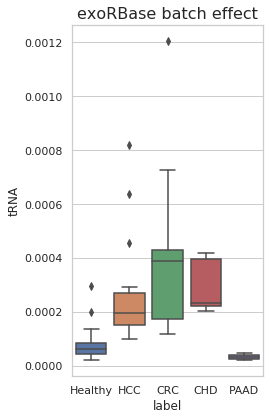

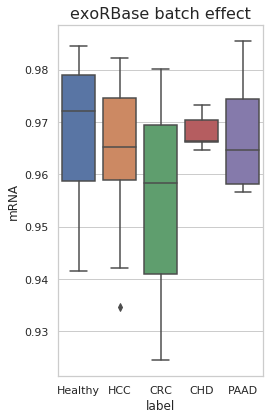

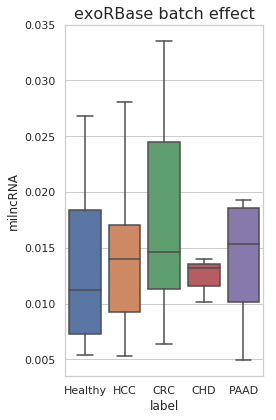

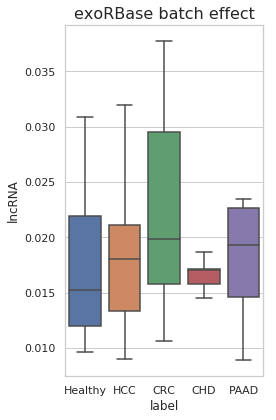

In [440]:
for i in tqdm(['exoRBase']):
    for j in tqdm(range(exorbasetypes.index.shape[0])):
        plot_rna_batch(i,exorbasetypes.index[j])

HBox(children=(IntProgress(value=0, max=3), HTML(value='')))

HBox(children=(IntProgress(value=0, max=9), HTML(value='')))

HBox(children=(IntProgress(value=0, max=9), HTML(value='')))

HBox(children=(IntProgress(value=0, max=9), HTML(value='')))

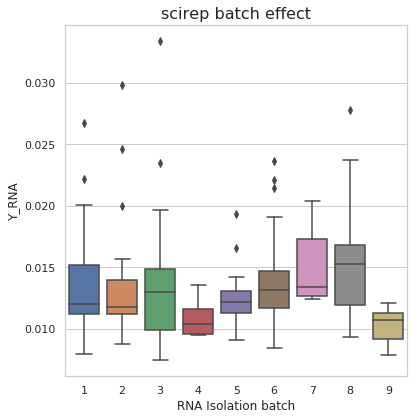

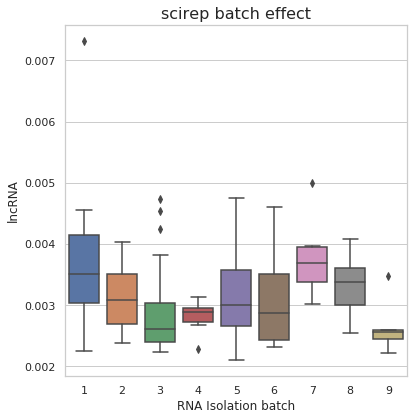

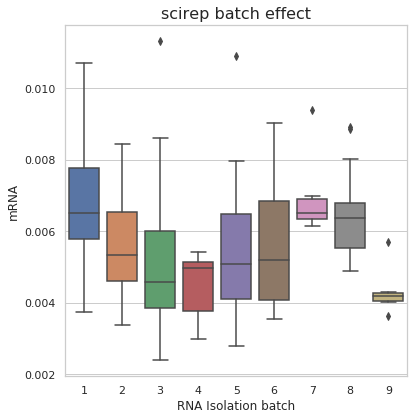

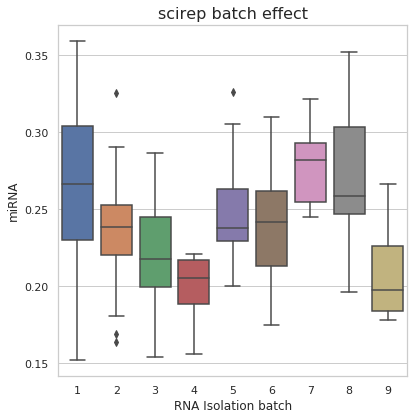

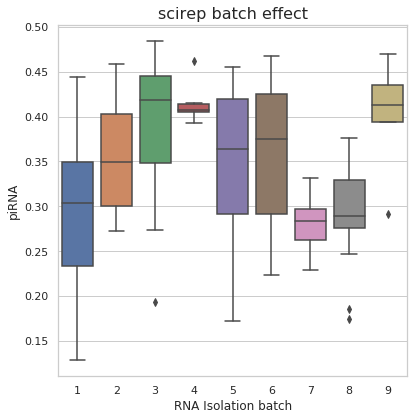

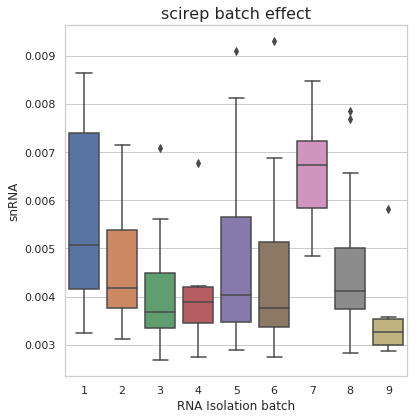

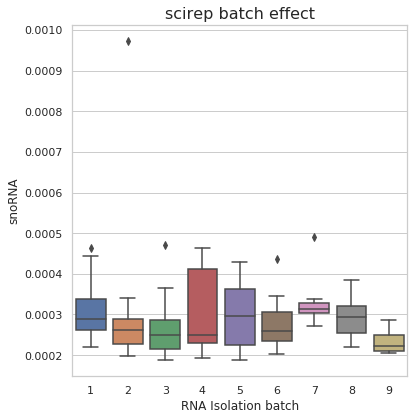

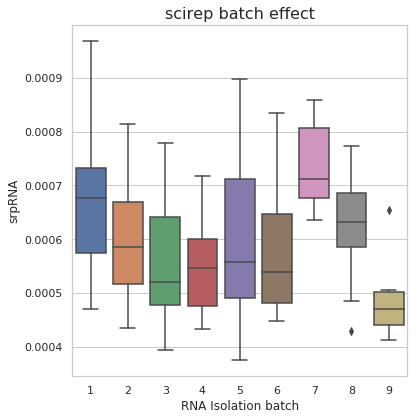

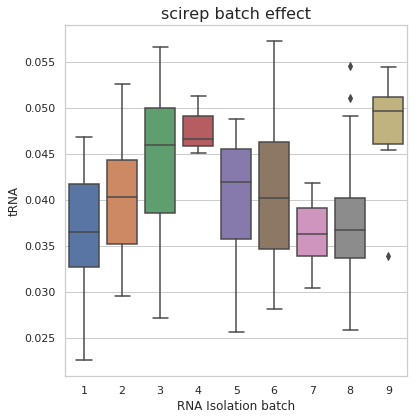

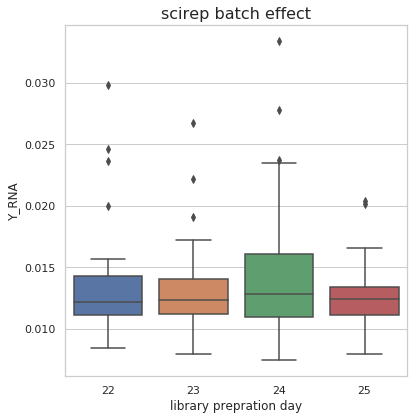

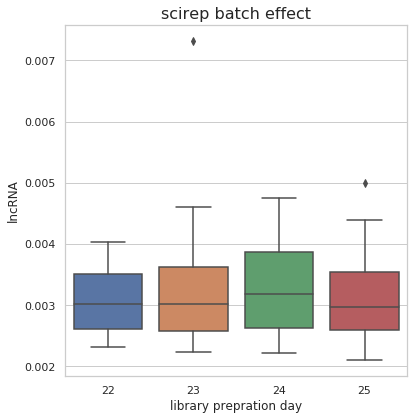

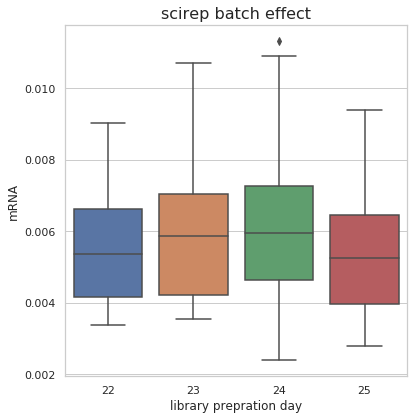

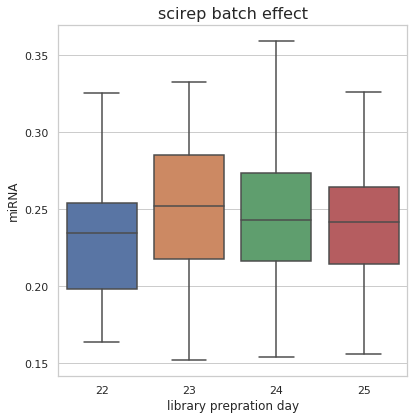

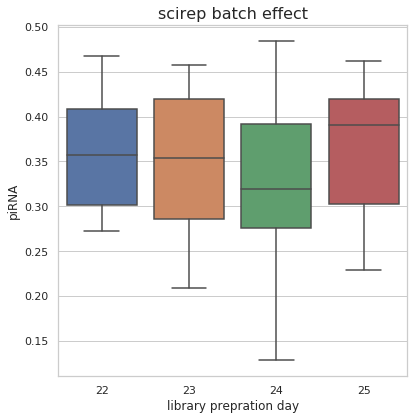

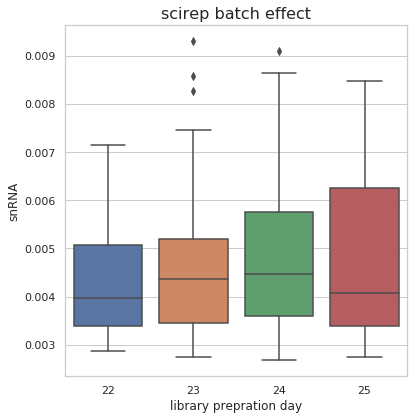

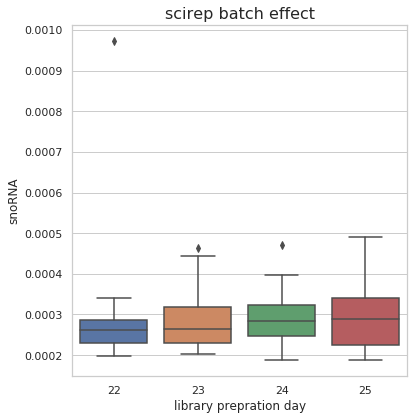

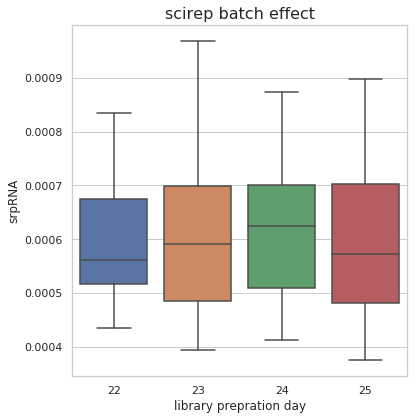

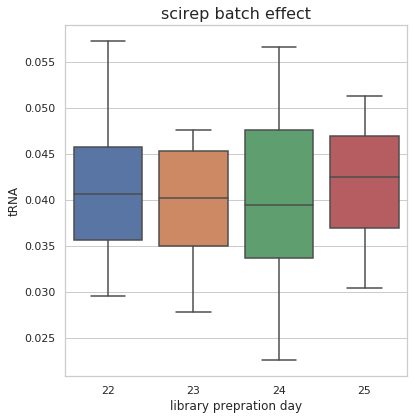

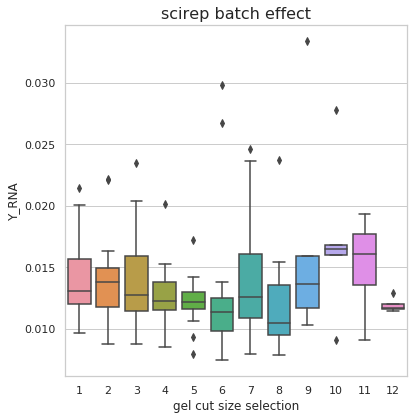

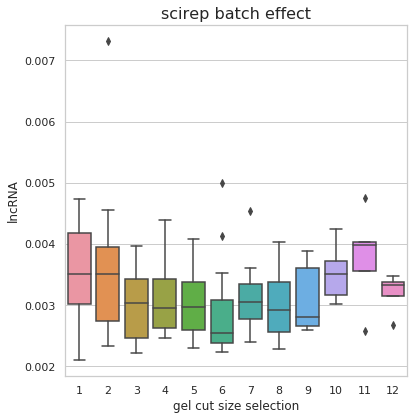

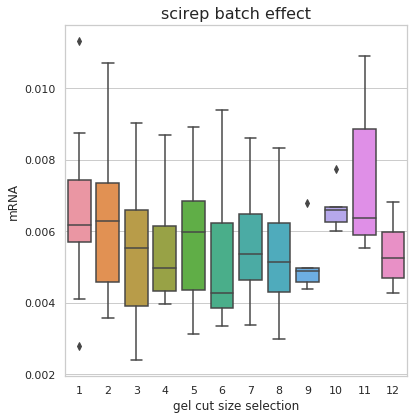

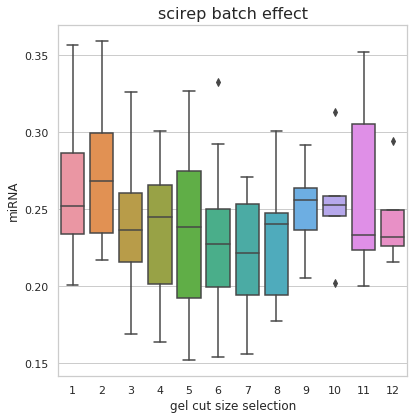

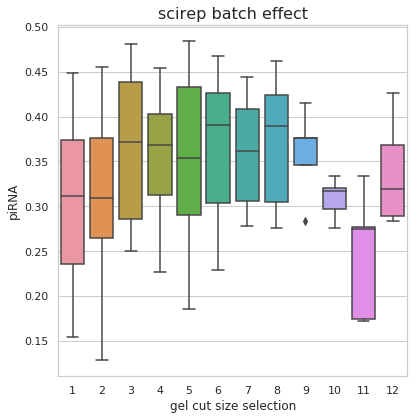

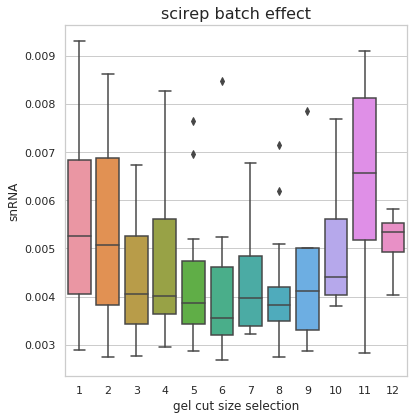

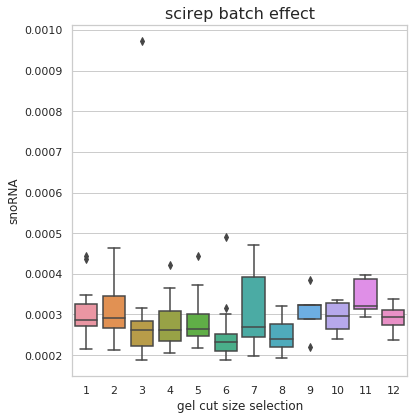

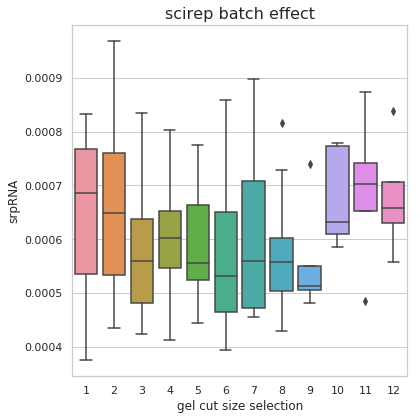

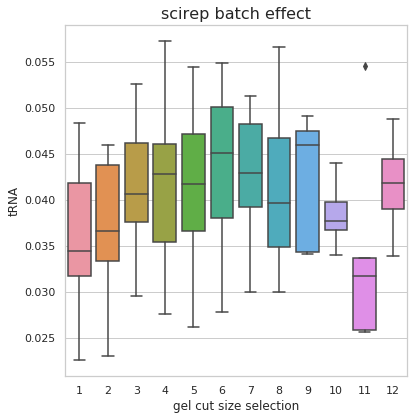

In [443]:
for i in tqdm(range(3)):
    for j in tqdm(range(interestedrna.shape[0])):
        plot_rna_batch('scirep',interestedrna[j],batchname=scirepbatch.columns[i])

### get all exorbase rna type stats

In [337]:
def get_table(path):
    table = pd.read_table(path)
    return table
tables = ['chd','crc','hcc','health','paad']
table = {}
for i in tables:
    table[i] = get_table('/BioII/lulab_b/caojingyi/project/exorbase/new_counts/matrix/'+i+'.type.sum').T
wholetable_sum = pd.concat((table['chd'],table['crc'],table['hcc'],table['health'],table['paad']),axis=1)

In [339]:
wholetable_sum.to_csv('data/exosome_exoRBase_stat/whole.csv',sep='\t')

In [343]:
wholetable_sum

,SRR5679904,SRR5679905,SRR5679906,SRR5679907,SRR5679908,SRR5679909,SRR5687235,SRR5687236,SRR5687237,SRR5687238,...,SRR5714912,SRR5714913,SRR5714914,SRR5714915,SRR5714916,SRR5714917,SRR5714918,SRR5714919,SRR5714920,SRR5714921
rRNA,1870,967,1255,1441,812,581,3053,4815,3613,4356,...,69,327,180,164,379,1402,612,636,599,21629
Y_RNA,76,22,66,72,61,82,322,255,314,272,...,6,4,37,16,88,15,159,22,234,476
snRNA,238,56,198,83,277,187,442,386,456,211,...,29,59,26,44,137,131,94,188,684,2564
snoRNA,158,329,233,128,429,265,2509,1379,2406,645,...,101,53,42,11,144,134,208,1643,2938,15058
srpRNA,28735,13443,20790,17392,16090,11412,15432,27879,21480,17672,...,3073,7576,4468,4844,8595,9246,10902,6831,7302,22274
vaultRNA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tRNA,2316,1668,3213,2115,2939,1220,4728,1956,4315,2686,...,204,300,315,356,939,396,479,267,290,5989
mRNA,10140380,7945311,7428570,8807926,7152625,4020295,6117875,5122104,9357085,6097443,...,5176491,8780107,12924650,8220044,20516017,17028050,14391740,9911474,7604629,8405613
milncRNA,141914,82971,101332,105047,103581,40374,165336,81386,209087,77338,...,104552,93670,258424,162898,389724,84990,119944,87708,124971,236941
lncRNA,179628,118593,130857,143113,138395,61427,196407,106715,249006,104902,...,126959,127126,312974,195639,480284,153562,172389,134486,193429,364553


In [342]:
interestedrna

array(['Y_RNA', 'lncRNA', 'mRNA', 'miRNA', 'piRNA', 'snRNA', 'snoRNA',
       'srpRNA', 'tRNA'], dtype='<U6')

In [230]:
ls /BioII/lulab_b/shared/projects/exRNA/published_exRNA/exosome_exoRBase

exosome_GSE100063_CRC/      exosome_GSE100207_HCC/   exosome_GSE99985_CHD/
exosome_GSE100206_Healthy/  exosome_GSE100232_PAAD/


In [310]:
ttt = pd.read_table('data/exosome_exoRBase_stat/readsN.stat.tsv',index_col=1).iloc[:,1:]

In [311]:
exorbasecpm.shape

(95075, 81)

In [312]:
exorabasetmp = pd.concat((exorbasetypes,ttt),axis=1)

In [313]:
tableexo = {}
for i in os.listdir('data/exosome_exoRBase_stat/'):
    try: 
        if i[0]=='S':
            tableexo[i.split('.')[0]] = pd.read_table('data/exosome_exoRBase_stat/'+i,index_col=2,header=None)
    except:
        print (i)

In [314]:
remain = []
for i in os.listdir('data/exosome_exoRBase_stat/'):
    if i[0]=='S':
        remain.append(i.split('.')[0])

In [315]:
exorabasetmp  = exorabasetmp.loc[interestedrna]

In [316]:
for i in range(len(remain)):
    ttttt= pd.DataFrame(tableexo[remain[i]].loc[interestedrna][3])
    ttttt.columns = [remain[i]]
    exorabasetmp =  pd.concat((exorabasetmp,ttttt),axis=1)

In [317]:
exorabasetmp.to_csv('data/exosome_exoRBase_stat/whole.csv',sep='\t')

In [321]:
np.unique(exorabasetmp.columns,return_counts=True)[0]

array(['SRR5712482', 'SRR5712483', 'SRR5712484', 'SRR5712485',
       'SRR5712486', 'SRR5712487', 'SRR5712488', 'SRR5712489',
       'SRR5712490', 'SRR5712491', 'SRR5712492', 'SRR5712493',
       'SRR5712494', 'SRR5712495', 'SRR5712496', 'SRR5712497',
       'SRR5712498', 'SRR5712499', 'SRR5712500', 'SRR5712501',
       'SRR5712502', 'SRR5712503', 'SRR5712504', 'SRR5712505',
       'SRR5712506', 'SRR5712507', 'SRR5712508', 'SRR5712509',
       'SRR5712510', 'SRR5712511', 'SRR5712512', 'SRR5712513',
       'SRR5712516', 'SRR5712517', 'SRR5712518', 'SRR5712519',
       'SRR5712520', 'SRR5712521', 'SRR5712522', 'SRR5712523',
       'SRR5712524', 'SRR5712525', 'SRR5712526', 'SRR5712527',
       'SRR5712528', 'SRR5712529', 'SRR5712530', 'SRR5712531',
       'SRR5712532', 'SRR5712533', 'SRR5712534', 'SRR5712535',
       'SRR5712536', 'SRR5714908', 'SRR5714908.1', 'SRR5714909',
       'SRR5714909.1', 'SRR5714910', 'SRR5714910.1', 'SRR5714911',
       'SRR5714911.1', 'SRR5714912', 'SRR5714912.

In [332]:
np.unique(np.concatenate((pd.read_csv('/home/chenxupeng/projects/TA/bioinfo_quiz/exrna/data/other_annotations/exorbase_rna_stats.csv').columns[1:],
ttt.columns,remain))).shape

(67,)

In [334]:
ls /BioII/lulab_b/shared/projects/exRNA/published_exRNA/exosome_exoRBase/

exosome_GSE100063_CRC/      exosome_GSE100207_HCC/   exosome_GSE99985_CHD/
exosome_GSE100206_Healthy/  exosome_GSE100232_PAAD/
